In [1]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

In [2]:
import numpy as np

In [14]:
import torch

In [15]:
from samplednn.mnistloader import setup_mnist_loader

In [16]:
mnist_test = setup_mnist_loader(train=True)

In [63]:
foo = np.load('models/bayesian/predictions/mnist_train_train/mnist_train_ep004.npy')
np.random.seed(42)
np.random.shuffle(foo)
test_data = foo[::20,::20].reshape(-1,10)

In [64]:
test_labels = mnist_test.dataset.targets.numpy()
np.random.seed(42)
np.random.shuffle(test_labels)
test_labels = test_labels[::20].repeat(5)

In [35]:
tsne = TSNE(
    n_components=2,
    perplexity=100,
    n_jobs=4,
    metric="euclidean",
    callbacks=ErrorLogger(),
    random_state=42
)

In [36]:
%time embedding = tsne.fit(test_data)

D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\pynndescent_.py", line 38:
    @numba.njit(parallel=True, fastmath=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\p

Iteration   50, KL divergence  4.3675, 50 iterations in 2.5163 sec
Iteration  100, KL divergence  4.3375, 50 iterations in 2.6097 sec
Iteration  150, KL divergence  4.3375, 50 iterations in 2.6272 sec
Iteration  200, KL divergence  4.3376, 50 iterations in 2.6100 sec
Iteration  250, KL divergence  4.3376, 50 iterations in 2.5961 sec
Iteration   50, KL divergence  2.5463, 50 iterations in 2.6771 sec
Iteration  100, KL divergence  2.2633, 50 iterations in 2.6747 sec
Iteration  150, KL divergence  2.1347, 50 iterations in 2.6135 sec
Iteration  200, KL divergence  2.0605, 50 iterations in 2.6425 sec
Iteration  250, KL divergence  2.0141, 50 iterations in 3.3042 sec
Iteration  300, KL divergence  1.9841, 50 iterations in 3.8233 sec
Iteration  350, KL divergence  1.9634, 50 iterations in 4.5016 sec
Iteration  400, KL divergence  1.9481, 50 iterations in 4.9638 sec
Iteration  450, KL divergence  1.9372, 50 iterations in 5.3563 sec
Iteration  500, KL divergence  1.9290, 50 iterations in 5.4394

In [10]:
from matplotlib import pyplot as plt

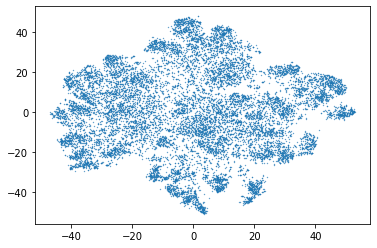

In [37]:
plt.scatter(embedding[:,0], embedding[:,1],s=0.1)

In [65]:
embedding_sorted = [x for _,x in sorted(zip(test_labels, embedding), key=lambda pair: pair[0])]

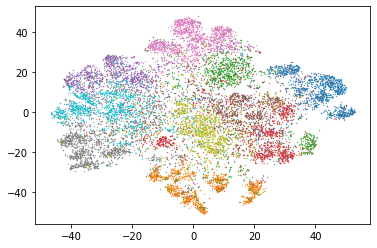

In [66]:
[plt.scatter(d[:,0], d[:,1],s=0.1) for d in np.array(embedding_sorted).reshape(10,-1,2)]